In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
import astropy.units as u

c:\program files (x86)\python36-32\lib\site-packages\matplotlib\__init__.py:513: UserWarning: matplotlibrc text.usetex option can not be used unless TeX-3.1415 or later is installed on your system
  'installed on your system') % tex_req)
c:\program files (x86)\python36-32\lib\site-packages\matplotlib\__init__.py:520: UserWarning: matplotlibrc text.usetex can not be used with *Agg backend unless dvipng-1.5 or later is installed on your system
  warnings.warn('matplotlibrc text.usetex can not be used with *Agg '
c:\program files (x86)\python36-32\lib\site-packages\matplotlib\__init__.py:535: UserWarning: matplotlibrc text.usetex can not be used unless ghostscript-7.07 or later is installed on your system
  'installed on your system') % gs_req)


Just some definitions for future reference
* $Q_i$ - Internal quality factor for the resonator
* $C_1$ - coupling capacitance to the feedline
* $L$ - Inductance of the resonator. Sum of the geometric and the kinetic inductance
* $Z_0$ - Line Impedance

In [2]:
# Determined from calculations + simulations of the resobolo at T=0.38K
Qi = 11492.87
C1 = 0.19 * u.pF
L = 9.99 * u.nH
Z0 = 50 * u.Ohm

I'll start by defining a range of resonant frequencies that I am interested in. For each resonant frequency there is a corresponding value of the resonator capacitance. I chose a range much larger than the frequency range of the 5 resobolos we had to get a better sense of the expected performance over a wide range of frequencies.

In [3]:
f_r = np.r_[50:450:1000j] * u.MHz
omega_r = (2*np.pi*f_r).to('1/s')
Ci = (1/L/omega_r**2).to('pF')

In [4]:
cap_xaxis_formatter = StrMethodFormatter("{x:3.0f}")
cap_yaxis_formatter = StrMethodFormatter("{x:1.1f}")
freq_formatter = StrMethodFormatter("{x:3.0f}")

Plot of the resonator capacitance vs the resonance frequency. Our test devices are in the 200-300 MHz range which corresponds to resonator capacitances of order 10s of pF. Really high resonant frequencies require much much lower values of the resonator capacitance and vice versa at lower resonant frequencies.

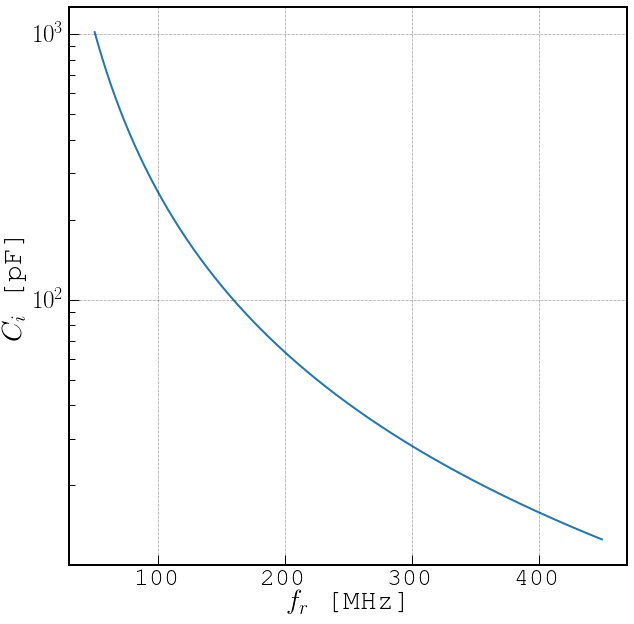

In [5]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.semilogy(f_r, Ci)
ax.set_xlabel(r'$f_r$ [MHz]');
ax.set_ylabel(r'$C_i$ [pF]')
ax.xaxis.set_major_formatter(cap_xaxis_formatter)
ax.xaxis.set_major_formatter(freq_formatter)
ax.grid('on');

For my calculation, I was interested in calculating the coupling capacitance to ground, $C_2$ , that I would be allowed to add  as a function of the resonator capacitance. Here, I've fixed $Q_i, Z_0, C_1, L$ to the values defined at the top of this page.

The starting point for this calculation is the coupling Q factor defined by the equation 

$$Q_c = \frac{2 C_i}{Z_0 \omega_r C_c^2}$$ where $C_c$ which is the total coupling capacitance is defined by the relation, $C_c^{-1} = C_1^{-1} + C_2^{-2}$.

For optimal performance, we want $Q_i = Q_c$. In addition, I'll eliminate $\omega_r$ in favor of $C_i$ and square the resulting equation to give

$$Q_i^2 = \frac{4L C_i^3}{Z_0^2 C_c^4}$$.

Solving for $C_c$ gives

$$C_c^{-1} = \left(\frac{Z_0^2 Q_i^2}{4 L C_i^3}\right)^{1/4} = \alpha$$.

We can now solve for $C_2$ to get the expression

$$C_2 = \frac{C_1}{C_1 \alpha - 1}$$.

Immediately we note that the expression above does not allow for all possible values of $C_2$. Specifically, the following condition must hold for us to be able to find a suitable value of the coupling capacitance to ground.

$$C_1 \alpha > 1$$.

In this case, it is of interest to figure out what possible range of resonator capacitances or resonant frequencies can allow for this condition. To do so, we raise the expression to the fourth power and define $x = C_i/C_1$. Our expression simplifies to

$$ x^3 < Q_i^2 * \left(\frac{C_1 Z_0^2}{4 L}\right) $$.

The expression in parentheses, which I'll call $\beta$ has a value of about $1/80$ for our choice of parameters. We thus have an upper bound on the size of the resonator capacitor.

$$C_i^0 = x \cdot C_1 <  23.65\ \textrm{pF}$$.

This also corresponds to resonant frequencies above $327.5\ \textrm{MHz}$. For resonators with frequencies below this regime, it is not possible to use purely capacitive coupling to ground while maintaing high coupling efficiency. However, this is only true for the choice of parameters used here. If a different choice of say the coupling capacitance to the feedline is made, the results could easily be adjusted.

We could have anticipated this problem if we noted that for $C_c = C_1$, the optimal coupling efficiency is at $C_c = \left(Q_i^2 \cdot \beta \right)^{1/3} C_1 = 23.65\ \textrm{pF} $ - our threshold capacitance! So in order to keep the coupling efficiency fixed at 1, we must choose $C_2$ to be infinitely big to ensure that it has zero contribution to the coupling efficiency.

As $C_i$ changes away from the threshold value, we would expect to have some wiggle room to add $C_2$. However, it seems that we can only decrease $C_1$ and not increase it. To understand this, we can examine the coupling efficiency and expand it around its threshold peak. Defining $\rho_c = Q_c/Q_i$, the coupling efficiency, $\chi_c$ is given by

$$\chi_c = \frac{4 \rho_c}{\left(1 + \rho_c\right)^2} \leq 1$$

The equality is achieved when $Q_c = Q_i$. At the threshold $\chi_c = 1$. We can then expand it for $Q_c = Q_i + \xi$ where $\xi$ is a small change in the coupling Q. To lowest order we get

$$\chi_c = \frac{\left(1 + \xi/Q_i \right)}{\left(1 + \xi/2 Q_i\right)^2} \approx 1 - \xi^2/Q_i^2$$

Now we can compute $\xi$ in terms of the change in the resonator capacitance $\delta C_i$. Since $Q_c \propto C_i^{3/2}$ we can write

$$Q_c = Q_i + \frac{3}{2} \left(\frac{\delta C_i}{C_i^0}\right)$$

This gives the expression for $\xi$. We can now re-express the coupling efficiency as 

$$\chi_c \approx 1 - \frac{9}{4} \left(\frac{\delta C_i}{C_i^0}\right)^2$$

This shows that whichever way we adjust the resonator capacitance, we always end up lowering the coupling efficiency. Our goal is to figure out if it is possible to compensate for this drop by adjusting the coupling capacitance to ground. The intuition here now, is that adding a capacitance in series (which is what we are doing) can only decrease the total capacitance. It can never increase it. To see this consider the expression $C_c = C_1 + \delta C_c$. But we know that $C_c = \left(C_1^{-1} + C_2^{-1} \right)^{-1}$. To lowest order in $C_2^{-1}$ we obtain the expression

$$C_c \approx C_1 - \frac{C_1^2}{C_2}$$.

Since $C_1, C_2 > 0 $, we can conclude that $C_c$ can only ever decrease.

Suppose that we now want to add a second perturbation to $Q_c$ to hopefully (fingers crossed) cancel out the first one. To do so, we add $C_2$, the coupling capacitance to ground. Under what conditions can $C_2$ achieve this? We consider the case when $\delta C_i > 0$ that is we are above the threshold capacitance (below the threshold frequency). In this regime, $Q_c > Q_i$ as we saw above. The total change in $Q_c$, $\delta Q_c$ when we change $C_c$ by the amount $\delta C_c$ as well as change $C_i$ by the amount $\delta C_i$ is given by

$$\delta Q_c = \frac{3}{2}\left(\frac{\delta C_i}{C_i^0}\right) -2 \left(\frac{\delta C_c}{C_1}\right)$$

Expressing $\delta C_c$ in terms of $C_1$ and $C_2$ gives

$$\delta Q_c = \frac{3}{2}\left(\frac{\delta C_i}{C_i^0}\right) + 2 \left(\frac{C_1}{C_2}\right)\ > 0 $$.

The expression is positive for all possible values of $C_2$. So we can't restore optimal efficiency by adding the coupling capacitance to ground once we are above the threshold resonator capacitance! To do so, we'd need negative capacitance to ground (kind of like an inductance) which is exactly what we see in this scenario.

In [6]:
beta = (C1 * Z0**2/4/L).to(1)
print (1/beta)

84.12631578947371


In [7]:
C_thresh = (Qi**2 * (C1 * Z0**2/4/L)).to(1)**(1/3) * C1
print (C_thresh)

22.083198377757032 pF


In [8]:
(1/2/np.pi/np.sqrt(L * C_thresh )).to('MHz')

<Quantity 338.8491500499509 MHz>

In [9]:
(Qi**2 * beta) **(1/3)* C1

<Quantity 22.083198377757032 pF>

In [10]:
(1/2/np.pi/np.sqrt(L * (Qi**2 * beta) **(1/3) * C1)).to('MHz')

<Quantity 338.8491500499509 MHz>

In [11]:
# A weird jumble of all the parameters of interest in 1 pile

alpha = (((4*L*Ci**3)/(Z0**2 * Qi**2))**-0.25).to('1/pF')

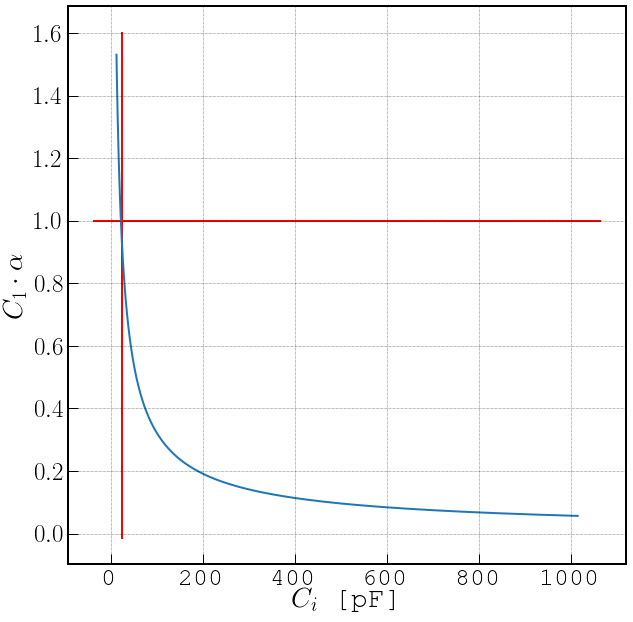

In [12]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.plot(Ci, (C1*alpha).to(1))
ax.set_xlabel(r'$C_i$ [pF]')
ax.set_ylabel(r'$C_1 \cdot \alpha$');
ax.xaxis.set_major_formatter(cap_xaxis_formatter)
# ax.yaxis.set_major_formatter(cap_yaxis_formatter)
xmin, xmax = ax.get_xlim()
ax.hlines(1, xmin, xmax,'r')
ymin, ymax = ax.get_ylim()
ax.vlines(23.6, ymin, ymax,'r')
ax.axis('tight')
ax.grid('on')

In [13]:
C2 = C1/(C1*alpha - 1)
mask = (Ci < 23 *u.pF)

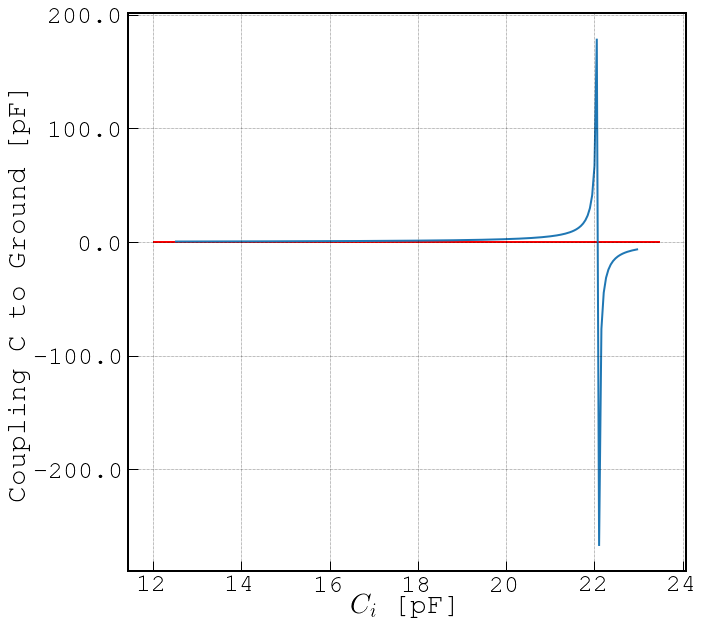

In [14]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.plot(Ci[mask], C2[mask])
ax.set_xlabel(r'$C_i$ [pF]')
ax.set_ylabel(r'Coupling C to Ground [pF]');
ax.xaxis.set_major_formatter(cap_xaxis_formatter)
ax.yaxis.set_major_formatter(cap_yaxis_formatter)
xmin, xmax = ax.get_xlim()
ax.hlines(C1.value, xmin, xmax,'r')
ax.axis('tight')
ax.grid('on')

# ax2 = ax.twiny();
# ticks = list(range(50, 600, 100))
# ax2.set_xticks(ticks)
# # ax2.plot(f_r[mask], C2[mask])
# ax2.xaxis.set_major_formatter(freq_formatter)
# ax2.invert_xaxis()
# ax2.set_xlabel(r'$f_r$ [MHz]');

In [15]:
Qi_thresh = np.sqrt((4*L*Ci**3/(Z0**2 * C1**4))).to(1)

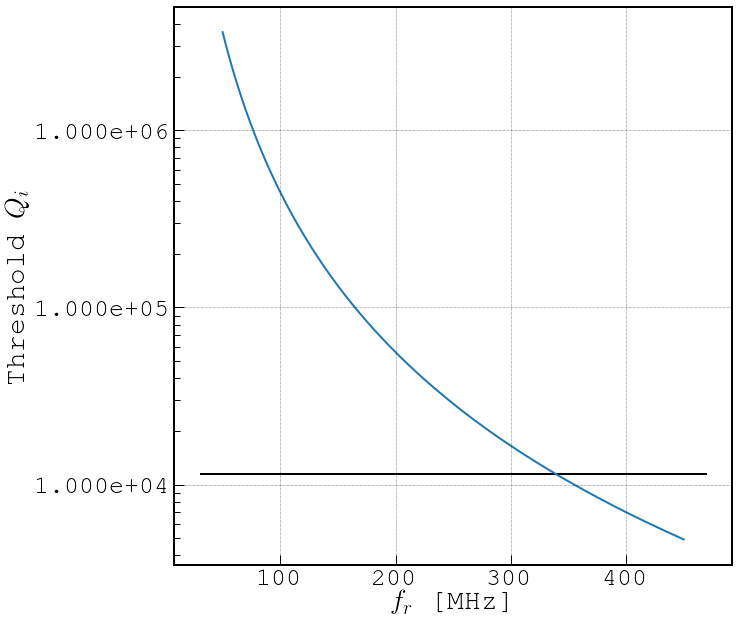

In [16]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.semilogy(f_r, Qi_thresh)
ax.set_xlabel(r'$f_r$ [MHz]');
ax.set_ylabel(r'Threshold $Q_i$');
# ticks = list(range(50, 600, 100))
# ax.set_xticks(ticks)
ax.xaxis.set_major_formatter(freq_formatter)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:1.3e}"))
xmin, xmax = ax.get_xlim()
ax.hlines(Qi, xmin, xmax, 'k')
ax.axis('tight')
ax.grid('on')

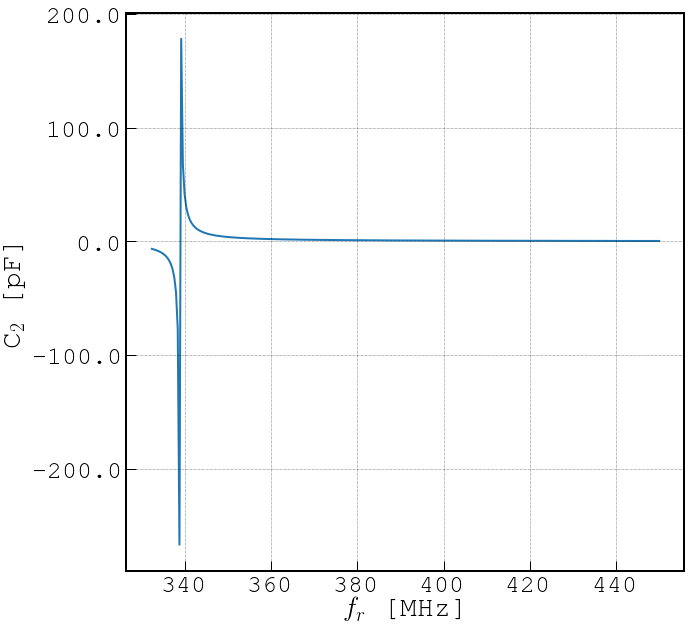

In [17]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.plot(f_r[mask], C2[mask])
ax.set_xlabel(r'$f_r$ [MHz]');
ax.set_ylabel(r'$\texttt{C}_2$ [pF]');
ax.xaxis.set_major_formatter(freq_formatter)
ax.yaxis.set_major_formatter(cap_yaxis_formatter)
ax.axis('tight')
ax.grid('on');

In [18]:
Cc = 1/(1/C1 + 1/C2)

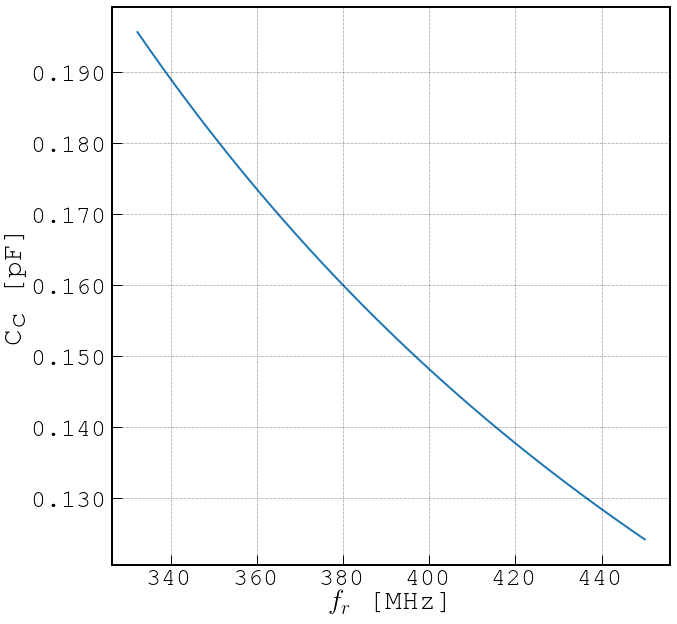

In [19]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.plot(f_r[mask], Cc[mask])
ax.set_xlabel(r'$f_r$ [MHz]');
ax.set_ylabel(r'$\texttt{C}_\texttt{c}$ [pF]');
ax.xaxis.set_major_formatter(freq_formatter)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:1.3f}"))
ax.axis('tight')
ax.grid('on');

In [20]:
Qc = (2*Ci/(omega_r * Cc**2 * Z0)).to(1)
rho_c = Qc/Qi
chi_c = (4*rho_c)/(1+rho_c)**2 # Coupling efficiency

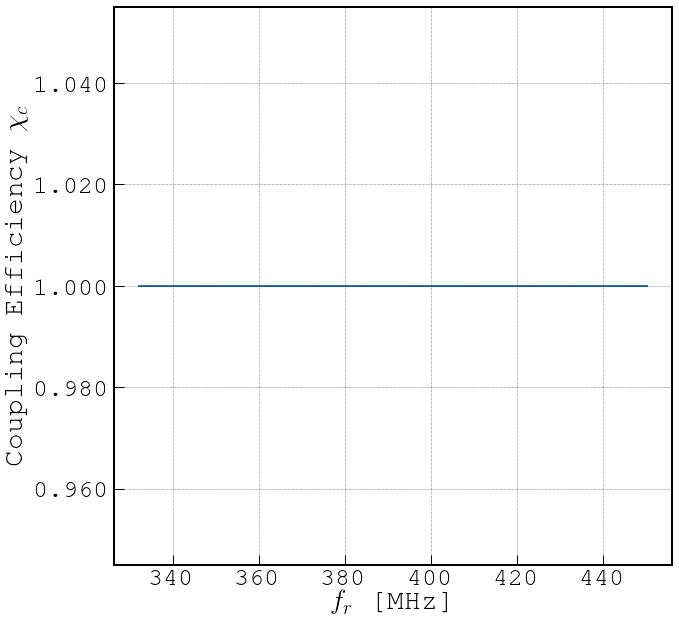

In [21]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.plot(f_r[mask], chi_c[mask])
ax.set_xlabel(r'$f_r$ [MHz]');
ax.set_ylabel(r'Coupling Efficiency $\chi_c$');
ax.xaxis.set_major_formatter(freq_formatter)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:1.3f}"))
ax.axis('tight')
ax.grid('on')

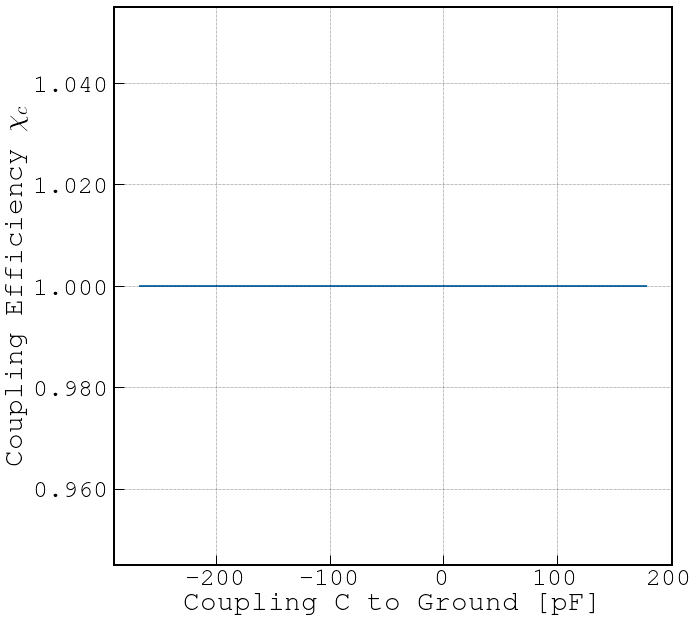

In [22]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.plot(C2, chi_c)
ax.set_ylabel(r'Coupling Efficiency $\chi_c$');
ax.set_xlabel(r'Coupling C to Ground [pF]');
ax.xaxis.set_major_formatter(cap_xaxis_formatter)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:1.3f}"))
ax.axis('tight')
ax.grid('on')

In [23]:
(1/((C_thresh * L)**0.5)/2/np.pi).to('MHz')

<Quantity 338.8491500499509 MHz>

Suppose I want to have resonant frequencies in the range $f_r > 200 \textrm{MHz}$. What choice of $C_1$ should I make to ensure that this is true? 

$$f_{thresh} = 200 \textrm{MHz} = \frac{1}{2 \pi\ \sqrt{L C_{i, thresh}}}$$

Rearranging the equation gives 

$$C_{i, thresh} = \frac{1}{L \cdot \left(2 \pi f_{thresh}\right)^2} = \left( Q_i^2 \beta \right)^{1/3} \ C_{1, thresh}$$

Solving for $C_{1, thresh}$ gives a lower bound in the size of the coupling capacitance to the feedline.

$$C_{1,thresh} = \sqrt{\frac{2}{\omega_{thresh}^3 Z_0 L Q_i}} = 0.419\ \textrm{pF}$$

For a choice of $C_1 \geq 0.419 \ \textrm{pF}$,  we can choose whichever value of $C_2$ maximizes the coupling efficiency.

In [24]:
omega_r_thresh = 2 * np.pi * 200 * u.MHz
C1_thresh = np.sqrt(2/(omega_r_thresh**3 * Z0 * L * Qi)).to('pF')
print(C1_thresh)

0.4190040380393615 pF


In [25]:
C1_thresh/C1

<Quantity 2.2052844107334812>

In [26]:
C1p = C1_thresh
C2p = C1p/(C1p * alpha - 1)


betap = (C1p * Z0**2/4/L).to(1)

Cip = (Qi**2 * betap)**(1/3) * C1p
print (Cip)
maskp = (Ci < Cip)

fip = ((1/2/np.pi)* 1/np.sqrt(L*Cip)).to('MHz')
print (fip)

63.38912890536645 pF
200.00000000000003 MHz


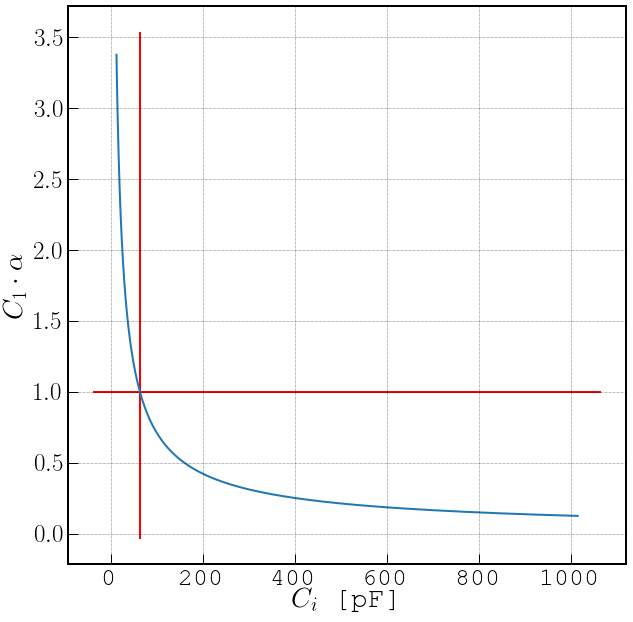

In [27]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.plot(Ci, (C1p*alpha).to(1))
ax.set_xlabel(r'$C_i$ [pF]')
ax.set_ylabel(r'$C_1 \cdot \alpha$');
ax.xaxis.set_major_formatter(cap_xaxis_formatter)
# ax.yaxis.set_major_formatter(cap_yaxis_formatter)
xmin, xmax = ax.get_xlim()
ax.hlines(1, xmin, xmax,'r')
ymin, ymax = ax.get_ylim()
ax.vlines(63.39, ymin, ymax,'r')
ax.axis('tight')
ax.grid('on')

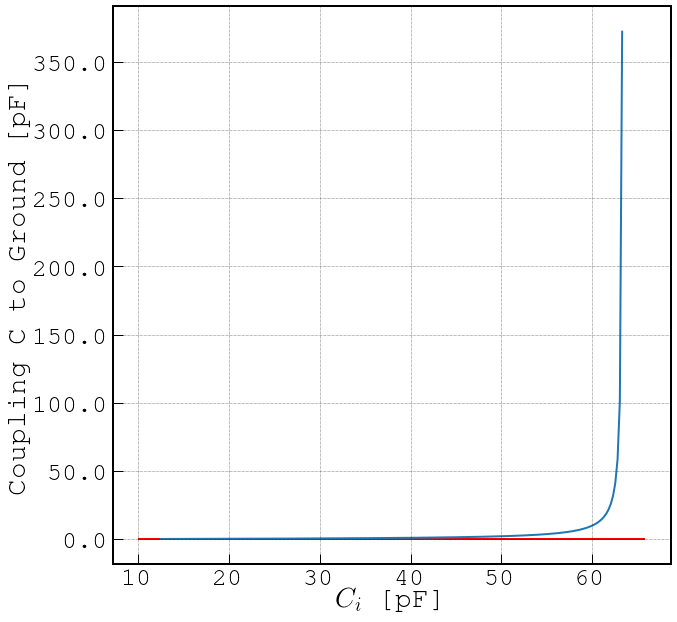

In [28]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.plot(Ci[maskp], C2p[maskp])
ax.set_xlabel(r'$C_i$ [pF]')
ax.set_ylabel(r'Coupling C to Ground [pF]');
ax.xaxis.set_major_formatter(cap_xaxis_formatter)
ax.yaxis.set_major_formatter(cap_yaxis_formatter)
xmin, xmax = ax.get_xlim()
ax.hlines(C1p.value, xmin, xmax,'r')
ax.axis('tight')
ax.grid('on')

# ax2 = ax.twiny();
# ticks = list(range(50, 600, 100))
# ax2.set_xticks(ticks)
# # ax2.plot(f_r[mask], C2[mask])
# ax2.xaxis.set_major_formatter(freq_formatter)
# ax2.invert_xaxis()
# ax2.set_xlabel(r'$f_r$ [MHz]');

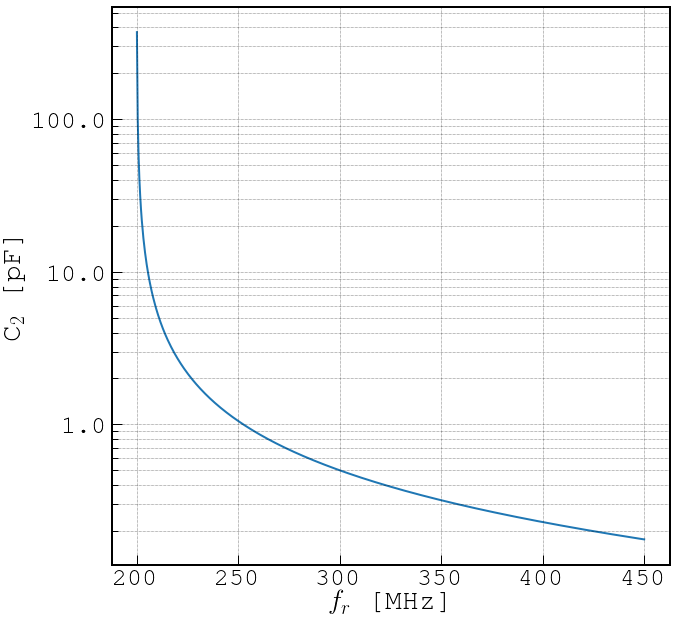

In [29]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.semilogy(f_r[maskp], C2p[maskp])
ax.set_xlabel(r'$f_r$ [MHz]');
ax.set_ylabel(r'$\texttt{C}_2$ [pF]');
ax.set_xticks([200, 250, 300, 350, 400, 450])
# ax.xaxis.set_minor_locator(plt.FixedLocator([2,3,4,5]))
# ax.set_xticklabels(['{0:3.0f}'.format(_) for _ in ax.get_xticks()])
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:3.0f}"))
ax.yaxis.set_major_formatter(cap_yaxis_formatter)
ax.axis('tight');
ax.grid('on', which='both');

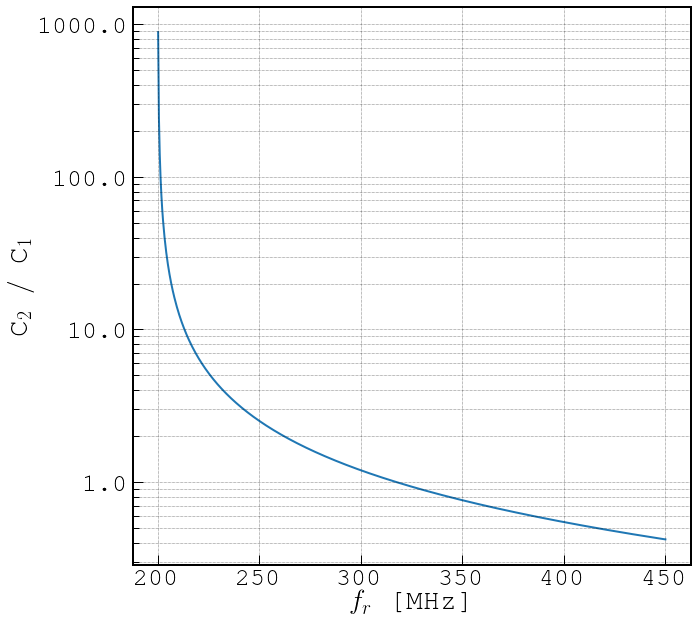

In [30]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.semilogy(f_r[maskp], (C2p[maskp]/C1p).to(1))
ax.set_xlabel(r'$f_r$ [MHz]');
ax.set_ylabel(r'$\texttt{C}_2 \ /\ \texttt{C}_1$');
ax.set_xticks([200, 250, 300, 350, 400, 450])
# ax.xaxis.set_minor_locator(plt.FixedLocator([2,3,4,5]))
# ax.set_xticklabels(['{0:3.0f}'.format(_) for _ in ax.get_xticks()])
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:3.0f}"))
ax.yaxis.set_major_formatter(cap_yaxis_formatter)
ax.axis('tight');
ax.grid('on', which='both');

In [31]:
Ccp = 1/(1/C1p + 1/C2p)

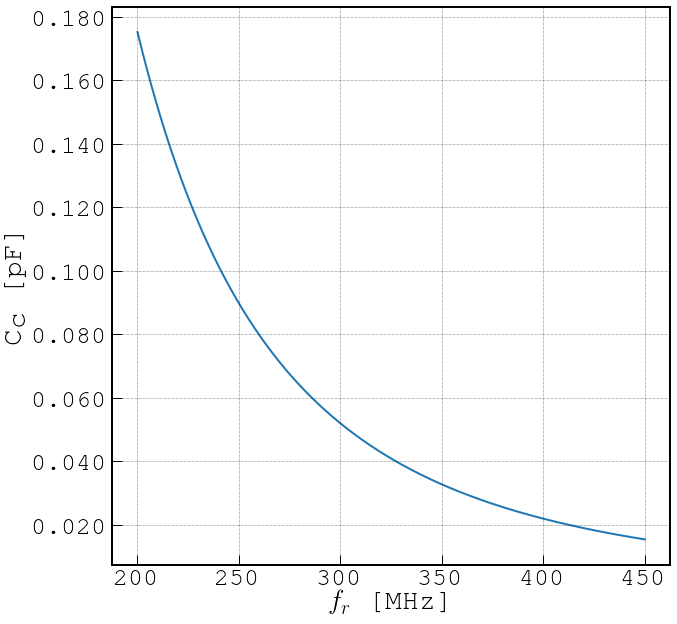

In [32]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.plot(f_r[maskp], Ccp[maskp]**2)
ax.set_xlabel(r'$f_r$ [MHz]');
ax.set_ylabel(r'$\texttt{C}_\texttt{c}$ [pF]');
ax.xaxis.set_major_formatter(freq_formatter)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:1.3f}"))
ax.axis('tight')
ax.grid('on');

In [33]:
Qcp = (2*Ci/(omega_r * Ccp**2 * Z0)).to(1)
rho_cp = Qcp/Qi
chi_cp = (4*rho_cp)/(1+rho_cp)**2 # Coupling efficiency

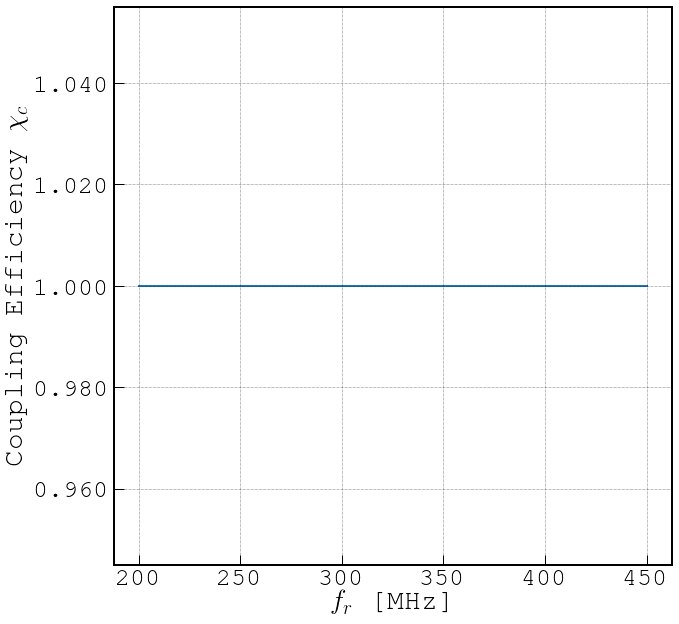

In [34]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.plot(f_r[maskp], chi_cp[maskp])
ax.set_xlabel(r'$f_r$ [MHz]');
ax.set_ylabel(r'Coupling Efficiency $\chi_c$');
ax.xaxis.set_major_formatter(freq_formatter)
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:1.3f}"))
ax.axis('tight')
ax.grid('on')

We can choose $C_2$ of about $1.05\ C_1$. Which is a good choice for resonant frequencies in the range $250 - 350\ \textrm{MHz}$. Below are the calculations of the coupling efficiency vs the resonant frequency for this range.

In [ ]:
C2_t = 1.05 * C1 # Our choice
Cc_t = 1/(1/C1 + 1/C2_t)
Qc_t = (2/(Z0 * L * C_c**2 * (2*np.pi*f_r)**3)).to(1)